# Kohonen Self-Organizing Maps

## Algoritma
---

_**Step 0**_ Inisialisasi bobot: $w_{ij}$ <br>
$\hspace{1.1cm}$ set parameter tetangga <br>
$\hspace{1.1cm}$ set *learning rate* $\alpha$ <br>
_**Step 1**_ Ketika kondisi berhenti bernilai *false*, kerjakan _Step 2-8_ <br>
$\hspace{1.1cm}$_**Step 2**_ Untuk setiap vektor input $x$, kerjakan _Step 3-5_ <br>
$\hspace{2.3cm}$_**Step 3**_ Untuk setiap $j$ hitung <br>
$\hspace{3.5cm}$ $D(j)=\sum_\limits{i}(w_{ij}-x_i)^2$ <br>
$\hspace{2.3cm}$_**Step 4**_ Tentukan $J$, sedemikian sehingga $D(J)$ minimum <br>
$\hspace{2.3cm}$_**Step 5**_ Untuk setiap unit $j$ dengan spesifikasi tetangga tertentu dari $J$, dan untuk setiap $i$ maka <br>
$\hspace{3.5cm}$ $w_{ij}(baru) = w_{ij}(lama)+\alpha[x_i-w_{ij}(lama)]$ <br>
$\hspace{1.1cm}$_**Step 6**_ Perbarui _learning rate_ <br>
$\hspace{1.1cm}$_**Step 7**_ Kurangi _radius_ ketetanggaan pada waktu-waktu tertentu <br>
$\hspace{1.1cm}$_**Step 8**_ Tes kondisi berhenti

---

## Implementasi Algoritma

##### 1. Mengimport library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### 2. Algoritma Kohonen Self-Organizing Maps

In [2]:
def KohonenSOM(x_unit,n_cluster,max_epoch,learning_rate=1,lr_decrease=0.5,radius=0):
    # Step 0
    w = np.random.uniform(size=(x_unit.shape[1],n_cluster))
    epoch = 0
    
    # Step 1
    while epoch < max_epoch:
        stop = True
        # Step 2
        for x in x_unit:
            # Step 3
            d = [sum((w[:,j] - x)**2) for j in range(w.shape[1])]
            
            # Step 4
            min_index = np.argmin(d)
            
            # Step 5
            left_index = min_index - radius
            right_index = min_index + radius
            
            # Ketika ketanggaan J diluar batas index
            if left_index < 0: left_index = 0
            if right_index >= w.shape[1]: right_index = w.shape[1]-1
            
            temp_w = np.copy(w)
            for j in range(left_index,right_index+1):
                w[:,j] += learning_rate*(x - w[:,j])
            
            delta_w = w - temp_w
            if not np.array_equal(delta_w,np.zeros(delta_w.shape)):
                stop = False
            
        # Step 6
        learning_rate *= lr_decrease
        
        # Step 7
        if radius>0 and epoch%5 == 0:
            radius -= 1
        
        # Step 8
        if stop:
            break
            
        epoch += 1
    return w

**Keterangan:** 
1. Inisialisasi bobot menggunakan bilangan acak berdistribusi uniform
2. Asumsikan _radius_ ketanggaan menggunakan array linear dari klaster unit
3. _Radius_ berkurang setiap setelah 5x epoch
4. Kondisi berhenti ketika tidak ada perubahan bobot yang terjadi

##### 3. Testing algoritma Kohonen Self-Organizing Maps

In [3]:
def PredictKohonenSOM(x_input,weight):
    d = [sum((weight[:,j] - x_input)**2) for j in range(weight.shape[1])]
    return np.argmin(d)

##### 4. Ploting hasil klaster

In [4]:
def PlotKohonenSOM(x,y,klaster,Title="",Xlabel="",Ylabel=""):
    plt.figure(figsize=(10,4))
    sns.scatterplot(x,y,hue=klaster,style=klaster,s=100,legend="full",palette="Set2")
    plt.title("Ilustrasi hasil klasterisasi pada "+Title)
    plt.xlabel(Xlabel)
    plt.ylabel(Ylabel)
    plt.legend(title="Klaster")
    plt.show()

## Contoh Soal

### Contoh 1: Kohonen Self-Organizing Maps untuk mengklaster 4 vektor

Misalkan terdapat vektor-vektor yang akan diklasterisasi yaitu:

$$(1,1,0,0),\,(0,0,0,1),\,(1,0,0,0),\,(0,0,1,1)$$

Vektor tersebut akan diklasterkan menjadi 2 klaster dengan _learning rate_ $\alpha(0)=0.6$ dan perubahan _learning rate_ mengikuti fungsi geometri $\alpha(t+1)=0.5\,\alpha(t)$.
Karena hanya 2 klaster, maka ketanggaan dari $J$ (_Step 4_) hanya merubah 1 klaster, artinya _radius_ $(R=0)$.

##### Implementasi algoritma Kohonen Self-Organizing Maps

In [5]:
# Inputan vektor
x_vektor = np.array([[1,1,0,0],
              [0,0,0,1],
              [1,0,0,0],
              [0,0,1,1]])

# Perhitungan bobot untuk setiap klaster dengan metode Kohonen Self-Organizing Maps
weight_vektor = KohonenSOM(x_vektor,2,100,learning_rate=0.6)

# Prediksi hasil klasterisasi
predKlaster_x = [PredictKohonenSOM(x,weight_vektor) for x in x_vektor]

##### Analisis hasil klaster

In [6]:
for i in range(len(x_vektor)):
    print("Vektor",x_vektor[i,:],"merupakan klaster ke ",predKlaster_x[i])

Vektor [1 1 0 0] merupakan klaster ke  0
Vektor [0 0 0 1] merupakan klaster ke  1
Vektor [1 0 0 0] merupakan klaster ke  0
Vektor [0 0 1 1] merupakan klaster ke  1


##### Ploting hasil klaster

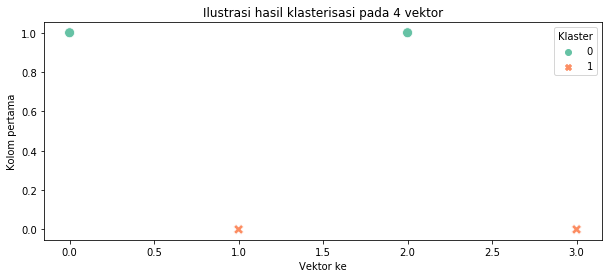

In [7]:
PlotKohonenSOM(range(4),x_vektor[:,0],predKlaster_x,Title="4 vektor",Xlabel="Vektor ke",Ylabel="Kolom pertama")

### Contoh 2: Kohonen Self-Organizing Maps untuk mengklaster _Mall Segmentation_

Terdapat data _Mall Segentation_ yang berisikan data _CustomerID_, _Gender_, _Age_, _Annual Income_ (k$), dan _Spending Score_ (1-100). Data tersebut ada pada file *Mall_Customers.csv* yang dapat di unduh pada link berikut: <a href="https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python" >Link Unduh</a>

Pada data tersebut, akan dilakukan klasterisasi menjadi 4 klaster dengan _learning rate_ $\alpha(0)=0.7$ dan perubahan _learning rate_ mengikuti fungsi geometri $\alpha(t+1)=0.4\,\alpha(t)$. Klasterisasi menggunakan _radius_ $(R=0)$ dan _radius_ $(R=4)$.

##### Preprocessing data

In [8]:
import pandas as pd
data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Dilakukan proses _encoding_ terlebih dahulu untuk data _Gender_, dimana mengubah _Gender Male_ menjadi 1 dan _Gender Female_ menjadi 0. Serta menghilangkan data _CustomerID_ karena tidak terlalu dibutuhkan.

In [9]:
data["Gender"]=[1 if dt=="Male" else 0 for dt in data["Gender"]]
data = data.drop(labels="CustomerID",axis=1)
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


##### Implementasi algoritma Kohonen Self-Organizing Maps

In [10]:
# Data input
data_values = data.values

# Perhitungan bobot untuk setiap klaster dengan metode Kohonen Self-Organizing Maps
# Radius awal = 0
data_weight0 = KohonenSOM(data_values,4,200,learning_rate=0.7,lr_decrease=0.4,radius=0)
# Radius awal = 4
data_weight4 = KohonenSOM(data_values,4,200,learning_rate=0.7,lr_decrease=0.4,radius=4)

# Prediksi hasil klasterisasi
predKlaster0 = [PredictKohonenSOM(dt,data_weight0) for dt in data_values]
predKlaster4 = [PredictKohonenSOM(dt,data_weight4) for dt in data_values]

##### Ploting hasil klaster

Ploting hasil klaster berdasarkan _Annual Income_ dan _Spending Score_

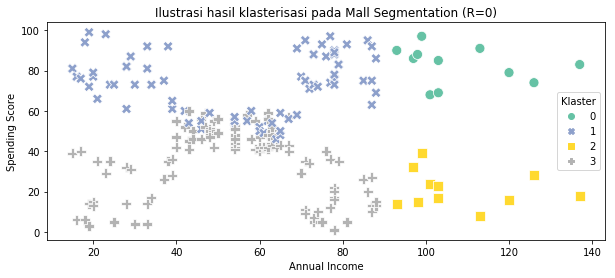

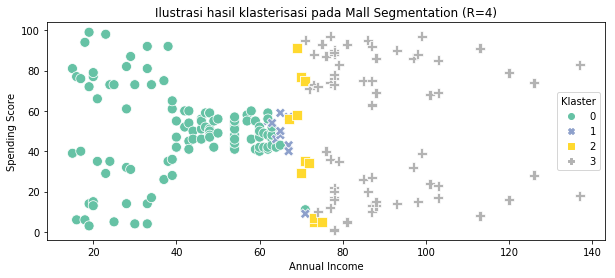

In [11]:
PlotKohonenSOM(data["Annual Income (k$)"],data["Spending Score (1-100)"],predKlaster0,Title="Mall Segmentation (R=0)",Xlabel="Annual Income",Ylabel="Spending Score")
PlotKohonenSOM(data["Annual Income (k$)"],data["Spending Score (1-100)"],predKlaster4,Title="Mall Segmentation (R=4)",Xlabel="Annual Income",Ylabel="Spending Score")

## Daftar Pustaka

[1] $\hspace{0.5cm}$ L. Fausett, _Fundamentals of Neural Networks_. Prentice Hall, 1994